In [607]:
import pandas as pd
import numpy as np

#### Understanding the DataSet

In [954]:
df = pd.read_csv('tweet_train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [955]:
df.rename(columns=({'target':'predication'}),inplace=True)
print(df.loc[1])

id                                                  4
keyword                                           NaN
location                                          NaN
text           Forest fire near La Ronge Sask. Canada
predication                                         1
Name: 1, dtype: object


In [956]:
df['predication'].value_counts()

0    4342
1    3271
Name: predication, dtype: int64

In [957]:
pd.DataFrame(df.isnull().sum())

,0
id,0
keyword,61
location,2533
text,0
predication,0


###### keyword is having 61 null values. let's analysi the values which are present

In [958]:
keyWordValues = df[df['keyword'].isnull() == False ]
keyWordValues[['keyword','text','predication']]
keyWordValues.groupby('keyword')[['keyword','predication']].sum()

,predication
keyword,
ablaze,13
accident,24
aftershock,0
airplane%20accident,30
ambulance,20
...,...
wounded,26
wounds,10
wreck,7


##### Key FIndings: there are lots of similar words , like wounded,wounds,
##### so we need to process it to make a same kind of word(lemmatizer)

In [959]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nitun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [960]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
# Use Case:
print(lemmatizer.lemmatize('wrecked', wordnet.VERB))

wreck


In [961]:
def lemmaTize(words):
    lemmaTizedWords = []
    if(len(words) > 0):
        lemmatizer = WordNetLemmatizer()
        for word in words:
            if(word != "" or word != "NaN" or word != "nan" ):
                val = lemmatizer.lemmatize(word, wordnet.VERB)
                lemmaTizedWords.append(val)
    return lemmaTizedWords
    

In [962]:
tobeLemma = keyWordValues['keyword'].values

len(tobeLemma), keyWordValues.shape[0]
tobeLemma

array(['ablaze', 'ablaze', 'ablaze', ..., 'wrecked', 'wrecked', 'wrecked'],
      dtype=object)

In [963]:
lemmaTizedWords = lemmaTize(tobeLemma)
lemmaTizedWords

['ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'ablaze',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'accident',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',

In [965]:
keyWordValues.groupby('keyword')[['keyword','predication']].sum()

,predication
keyword,
ablaze,13
accident,24
aftershock,0
airplane%20accident,30
ambulance,20
...,...
wildfire,29
windstorm,16
wound,36


In [966]:

df['keyword'] = df['keyword'].astype(str)
df['keyword'] = lemmaTize(df['keyword'].values)


In [967]:
df['keyword'].replace('nan',np.NaN,inplace=True)


In [968]:
df.isnull().sum()

id                0
keyword          61
location       2533
text              0
predication       0
dtype: int64

#### Tokenizer

In [969]:
#tokenizer eg:
tokenizer = nltk.RegexpTokenizer(r"\w+")
text_msg = "Saransh is a good Boy"
tokenized_msg = tokenizer.tokenize(text_msg)
tokenized_msg
#make it lower case
# tokenized_lowwerCase = [t.lower() for t in tokenized_msg]

# test_message_useful_tokens = [t for t in test_message_lemmatized_tokens if t not in stopwords]
lemmaTize(tokenized_lowwerCase)

['saransh', 'be', 'a', 'good', 'boy']

In [970]:
df.columns

df['text']

tokenizedTextValueOfDF = []
for text in df['text']:
    tokenized_msg = tokenizer.tokenize(text)
    tokenized_lowwerCaseOF_DF = [t.lower() for t in tokenized_msg]
    
    tokenizedTextValueOfDF.append(tokenized_lowwerCaseOF_DF)

tokenizedTextValueOfDF = np.asanyarray(tokenizedTextValueOfDF,dtype=object)
lemmanizedtokenizedTextValueOfDF = []
for t in tokenizedTextValueOfDF:
    temp_tokenized_list = lemmaTize(t);
    temp_tokenized_list = np.asanyarray(temp_tokenized_list,dtype=object)
    lemmanizedtokenizedTextValueOfDF.append(temp_tokenized_list)
# 
# lemmanizedtokenizedTextValueOfDF   

In [971]:
lemmanizedtokenizedTextValueOfDF
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
# lemmanizedtokenizedTextValueOfDF = [t for t in lemmanizedtokenizedTextValueOfDF if t not in stopwords]

[array(['our', 'deeds', 'be', 'the', 'reason', 'of', 'this', 'earthquake',
        'may', 'allah', 'forgive', 'us', 'all'], dtype=object),
 array(['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
       dtype=object),
 array(['all', 'residents', 'ask', 'to', 'shelter', 'in', 'place', 'be',
        'be', 'notify', 'by', 'officer', 'no', 'other', 'evacuation', 'or',
        'shelter', 'in', 'place', 'order', 'be', 'expect'], dtype=object),
 array(['13', '000', 'people', 'receive', 'wildfires', 'evacuation',
        'order', 'in', 'california'], dtype=object),
 array(['just', 'get', 'send', 'this', 'photo', 'from', 'ruby', 'alaska',
        'as', 'smoke', 'from', 'wildfires', 'pour', 'into', 'a', 'school'],
       dtype=object),
 array(['rockyfire', 'update', 'california', 'hwy', '20', 'close', 'in',
        'both', 'directions', 'due', 'to', 'lake', 'county', 'fire',
        'cafire', 'wildfires'], dtype=object),
 array(['flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 

In [972]:
lemmanizedtokenizedTextValueOfDF = np.asanyarray(lemmanizedtokenizedTextValueOfDF,dtype=object)
lemmanizedtokenizedTextValueOfDF = np.concatenate(lemmanizedtokenizedTextValueOfDF)
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmanizedtokenizedTextValueOfDF = [t for t in lemmanizedtokenizedTextValueOfDF if t not in stopwords]



In [973]:
import re
lemmanizedtokenizedTextValueOfDF[0:500]

cleaned_tokens = []
for token in lemmanizedtokenizedTextValueOfDF:
    # Remove any non-alphabetic characters from the token
    cleaned_token = re.sub('[^a-zA-Z]+', '', token)
    cleaned_tokens.append(cleaned_token)
cleaned_tokens

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'residents',
 'ask',
 'shelter',
 'place',
 'notify',
 'officer',
 'evacuation',
 'shelter',
 'place',
 'order',
 'expect',
 '',
 '',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'order',
 'california',
 'get',
 'send',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pour',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '',
 'close',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cause',
 'flash',
 'flood',
 'streets',
 'manitou',
 'colorado',
 'spring',
 'areas',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happen',
 'build',
 'across',
 'street',
 'afraid',
 'tornado',
 'come',
 'area',
 'three',
 'people',
 'die',
 'heat',
 'wave',
 'far',
 'haha',
 'south',
 'tampa',
 'get',
 'flood',
 'hah',
 'wait',
 'second',
 

In [974]:
# counter = {}
unique, counts = np.unique(cleaned_tokens,return_counts= True)
counter = np.array((unique, counts)).T
counter[0:10]

array([['', '3162'],
       ['a', '23'],
       ['aa', '4'],
       ['aaaa', '1'],
       ['aaaaaaallll', '1'],
       ['aaaaaand', '1'],
       ['aaarrrgghhh', '1'],
       ['aaceorg', '1'],
       ['aadzvsr', '1'],
       ['aal', '1']], dtype='<U31')

In [975]:
# featcer
features = set() 
for f in counter:
    if(f[1].astype(int) > 10):
        features.add(f[0]) 
        
features = np.array(list(features),dtype=object)
len(features)

1263

In [976]:
# mentionedKeywords = keyWordValues['keyword'].values
# mentionedKeywords
# features = np.concatenate((mentionedKeywords,features))
# len(features)
features

array(['', 'glass', 'drink', ..., 'silver', 'well', 'casualties'],
      dtype=object)

In [977]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

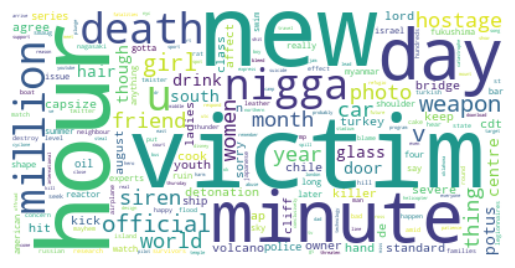

In [978]:
text = " ".join(i for i in features)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [979]:
features

array(['', 'glass', 'drink', ..., 'silver', 'well', 'casualties'],
      dtype=object)

In [980]:
def getFormatedMessage(message):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_msg = tokenizer.tokenize(message)
    #make it lower case
    tokenized_lowwerCase = [t.lower() for t in tokenized_msg]  
    return np.array(lemmaTize(tokenized_lowwerCase),dtype=object)
    

In [981]:
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
# token_to_index_mapping 

{'': 0,
 'glass': 1,
 'drink': 2,
 'hair': 3,
 'south': 4,
 'centre': 5,
 'though': 6,
 'potus': 7,
 'door': 8,
 'capsize': 9,
 'cdt': 10,
 'bridge': 11,
 'turkey': 12,
 'severe': 13,
 'keep': 14,
 'agree': 15,
 'n': 16,
 'august': 17,
 'hit': 18,
 'owner': 19,
 'class': 20,
 'killer': 21,
 'cook': 22,
 'volcano': 23,
 'kick': 24,
 'detonation': 25,
 'youth': 26,
 'hand': 27,
 'de': 28,
 'standard': 29,
 'cliff': 30,
 'ladies': 31,
 'ap': 32,
 'chile': 33,
 'affect': 34,
 'lord': 35,
 'sorry': 36,
 'series': 37,
 'oil': 38,
 'ship': 39,
 'police': 40,
 'myanmar': 41,
 'four': 42,
 'later': 43,
 'really': 44,
 'experts': 45,
 'reactor': 46,
 'bar': 47,
 'issue': 48,
 'fukushima': 49,
 'summer': 50,
 'long': 51,
 'sky': 52,
 'israel': 53,
 'shoulder': 54,
 'shape': 55,
 'http': 56,
 'gotta': 57,
 'swim': 58,
 'american': 59,
 'anything': 60,
 'ruin': 61,
 'watch': 62,
 'could': 63,
 'say': 64,
 'research': 65,
 'neighbour': 66,
 'happy': 67,
 'victim': 68,
 'blame': 69,
 'rat': 70,
 'hun

In [982]:
count_vector = np.zeros(len(features))
count_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [983]:
def messgae_to_Count(message):
    count_vector = np.zeros(len(features))
    lm = getFormatedMessage(message)
    for l in features:
        if(l not in lm):
            continue
        index = token_to_index_mapping[l]
        count_vector[index] += 1 
    return count_vector

In [984]:
messgae_to_Count(df['text'].loc[80])

array([0., 0., 0., ..., 0., 0., 0.])

In [985]:
df.loc[80]

id                                                           117
keyword                                                 accident
location                                                     NaN
text           mom: 'we didn't get home as fast as we wished'...
predication                                                    0
Name: 80, dtype: object

In [986]:
def addFechter(df):
    featList = []
    for i in df['text'].values:
        featListTemp = messgae_to_Count(i)
        featList.append(featListTemp)
    df= pd.concat([df, pd.DataFrame(featList, columns=features)], axis=1)
    return df

In [987]:
df = addFechter(df)


In [991]:
# type(df)
# df.drop(columns='',inplace=True)
df

,id,keyword,location,text,predication,glass,drink,hair,south,centre,...,dont,vehicle,bloody,department,aug,michael,ignition,silver,well,casualties
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [993]:
df.drop(columns=['id','keyword','location','text'],inplace=True)

In [1000]:
df['predication']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7608    1.0
7609    1.0
7610    1.0
7611    1.0
7612    1.0
Name: predication, Length: 7613, dtype: float64

In [995]:
df

,predication,glass,drink,hair,south,centre,though,potus,door,capsize,...,dont,vehicle,bloody,department,aug,michael,ignition,silver,well,casualties
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

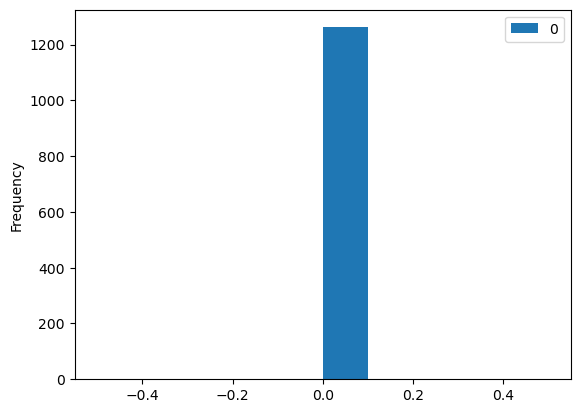

In [996]:
pd.DataFrame(df.isnull().sum()).plot(kind='hist')

In [997]:
df['predication'] = df['predication'].astype(float)

In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 1262 entries, predication to casualties
dtypes: float64(1262)
memory usage: 73.3 MB


In [999]:
from sklearn.model_selection import train_test_split

In [1012]:
y = df['predication'].values
x = df.loc[:, df.columns != 'predication'].values

In [1013]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [1014]:
y_train.shape

(5100,)

In [1007]:
y_train = tf.convert_to_tensor(y_train)

In [1008]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
160/160 [==============================] - 2s 4ms/step - loss: 0.6872 - accuracy: 0.5724
Epoch 2/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.6751 - accuracy: 0.5796
Epoch 3/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.5900
Epoch 4/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.6202
Epoch 5/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.6109 - accuracy: 0.6759
Epoch 6/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.5852 - accuracy: 0.7229
Epoch 7/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.5595 - accuracy: 0.7627
Epoch 8/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.5343 - accuracy: 0.7888
Epoch 9/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.5102 - accuracy: 0.8047
Epoch 10/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.486

160/160 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.9653
Epoch 81/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9663
Epoch 82/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9659
Epoch 83/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0991 - accuracy: 0.9673
Epoch 84/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0976 - accuracy: 0.9676
Epoch 85/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0963 - accuracy: 0.9680
Epoch 86/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0945 - accuracy: 0.9682
Epoch 87/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0933 - accuracy: 0.9682
Epoch 88/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9688
Epoch 89/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0902 - a

160/160 [==============================] - 1s 4ms/step - loss: 0.0468 - accuracy: 0.9796
Epoch 160/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9792
Epoch 161/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9792
Epoch 162/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9794
Epoch 163/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9790
Epoch 164/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0455 - accuracy: 0.9800
Epoch 165/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9798
Epoch 166/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0450 - accuracy: 0.9790
Epoch 167/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9790
Epoch 168/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9802
Epoch 238/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9794
Epoch 239/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9804
Epoch 240/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9812
Epoch 241/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9804
Epoch 242/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9800
Epoch 243/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9802
Epoch 244/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9802
Epoch 245/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9788
Epoch 246/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9796
Epoch 316/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9792
Epoch 317/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9806
Epoch 318/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9806
Epoch 319/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9798
Epoch 320/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9808
Epoch 321/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9806
Epoch 322/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9798
Epoch 323/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9792
Epoch 324/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9810
Epoch 394/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9802
Epoch 395/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9792
Epoch 396/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9798
Epoch 397/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9808
Epoch 398/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9802
Epoch 399/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9806
Epoch 400/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9786
Epoch 401/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9800
Epoch 402/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0353 - accuracy: 0.9788
Epoch 472/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9798
Epoch 473/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0353 - accuracy: 0.9792
Epoch 474/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9810
Epoch 475/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9800
Epoch 476/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9796
Epoch 477/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9796
Epoch 478/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9800
Epoch 479/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9800
Epoch 480/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9792
Epoch 550/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9796
Epoch 551/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9788
Epoch 552/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9788
Epoch 553/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9794
Epoch 554/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9792
Epoch 555/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9796
Epoch 556/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9796
Epoch 557/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9804
Epoch 558/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0344 - accuracy: 0.9804
Epoch 628/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9796
Epoch 629/1000
160/160 [==============================] - 1s 5ms/step - loss: 0.0346 - accuracy: 0.9790
Epoch 630/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9814
Epoch 631/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9804
Epoch 632/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9794
Epoch 633/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9808
Epoch 634/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9800
Epoch 635/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9794
Epoch 636/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0344 - accuracy: 0.9798
Epoch 706/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9802
Epoch 707/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9806
Epoch 708/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9804
Epoch 709/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9818
Epoch 710/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9798
Epoch 711/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9800
Epoch 712/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9814
Epoch 713/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9806
Epoch 714/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9798
Epoch 784/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9794
Epoch 785/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9812
Epoch 786/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9810
Epoch 787/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9808
Epoch 788/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9778
Epoch 789/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9804
Epoch 790/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0344 - accuracy: 0.9794
Epoch 791/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9806
Epoch 792/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9812
Epoch 862/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9814
Epoch 863/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9794
Epoch 864/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9796
Epoch 865/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9792
Epoch 866/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9806
Epoch 867/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9798
Epoch 868/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9800
Epoch 869/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9800
Epoch 870/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

160/160 [==============================] - 1s 4ms/step - loss: 0.0339 - accuracy: 0.9804
Epoch 940/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9798
Epoch 941/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9804
Epoch 942/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9800
Epoch 943/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9792
Epoch 944/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9806
Epoch 945/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9818
Epoch 946/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9806
Epoch 947/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9802
Epoch 948/1000
160/160 [==============================] - 1s 4ms/step - loss: 0

In [1009]:
y_predit = model.predict(X_test)

79/79 [==============================] - 0s 2ms/step


In [1010]:
y_predit = np.where(y_predit >= 0.5,1.0,0.0)

In [808]:
rf_pred = rf.predict(X_test)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [809]:
rf_pred = np.where(rf_pred >= 0.5,1.0,0.0)

In [810]:
y_predit

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [1017]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_predit)

0.7385594906486271

In [820]:
##random Forest
rf_pred
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, rf_pred)

0.9960206923995225

In [1037]:
df_test = pd.read_csv('tweet_test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [1028]:
def addFechter(df_test):
    featList = []
    for i in df_test['text'].values:
        featListTemp = messgae_to_Count(i)
        featList.append(featListTemp)
    df_test= pd.concat([df_test, pd.DataFrame(featList, columns=features)], axis=1)
    return df_test


In [1029]:
df_test = addFechter(df_test)

In [1030]:
df_test.drop(columns=['id','keyword','location','text',''],inplace=True)

In [1031]:
test = tf.convert_to_tensor(df_test.values)

In [1032]:
df_test

,glass,drink,hair,south,centre,though,potus,door,capsize,cdt,...,dont,vehicle,bloody,department,aug,michael,ignition,silver,well,casualties
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1033]:
test_pred = model.predict(test)

102/102 [==============================] - 0s 3ms/step


In [1034]:
test_pred = np.where(test_pred >= 0.5 , 1,0)
test_pred = test_pred.flatten()

In [1039]:
df_test['target'] = test_pred
df_test['target']

0       1
1       1
2       0
3       0
4       1
       ..
3258    1
3259    0
3260    1
3261    1
3262    0
Name: target, Length: 3263, dtype: int32

In [1040]:
submisstion = df_test[['id','target']]
submisstion.to_csv('Natural Language Processing with Disaster Tweets.csv',index=False)

## Test with real Data::

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Dude jumping out of his car during police chase &amp; walking away in plain sight🤔<a href="https://twitter.com/hashtag/crazyvideos?src=hash&amp;ref_src=twsrc%5Etfw">#crazyvideos</a> <a href="https://twitter.com/hashtag/police?src=hash&amp;ref_src=twsrc%5Etfw">#police</a> <a href="https://twitter.com/hashtag/gta?src=hash&amp;ref_src=twsrc%5Etfw">#gta</a> <a href="https://twitter.com/hashtag/fights?src=hash&amp;ref_src=twsrc%5Etfw">#fights</a> <a href="https://twitter.com/hashtag/hoodfights?src=hash&amp;ref_src=twsrc%5Etfw">#hoodfights</a> <a href="https://twitter.com/hashtag/gang?src=hash&amp;ref_src=twsrc%5Etfw">#gang</a> <a href="https://t.co/ezgMNlgviy">pic.twitter.com/ezgMNlgviy</a></p>&mdash; nofones (@nofones) <a href="https://twitter.com/nofones/status/1649519971746103301?ref_src=twsrc%5Etfw">April 21, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [1080]:
twitt = pd.DataFrame({'id': [0],
                      'keyword': ['NaN'],
                      'location': ['NaN'],
                      'text': ['Dude jumping out of his car during  police chase & walking away in plain sight🤔#crazyvideos #police #gta #fights #hoodfights #gang']
                     })

In [1081]:
twitt

,id,keyword,location,text
0,0,NaN,NaN,Dude jumping out of his car during police cha...


In [1082]:
twitt = addFechter(twitt)


In [1083]:
twitt

,id,keyword,location,text,,glass,drink,hair,south,centre,...,dont,vehicle,bloody,department,aug,michael,ignition,silver,well,casualties
0,0,NaN,NaN,Dude jumping out of his car during police cha...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1084]:
twitt.drop(columns=['id','keyword','location','text',''],inplace=True)

In [1085]:
x = tf.convert_to_tensor(twitt.values)

In [1086]:
x_pred = model.predict(x)

1/1 [==============================] - 0s 47ms/step


In [1087]:
np.where(x_pred >= 0.5 , 1,0)

array([[1]])